In [55]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Visualizing Single Audio

In [3]:
random_file_name = "./disco.00005.wav"

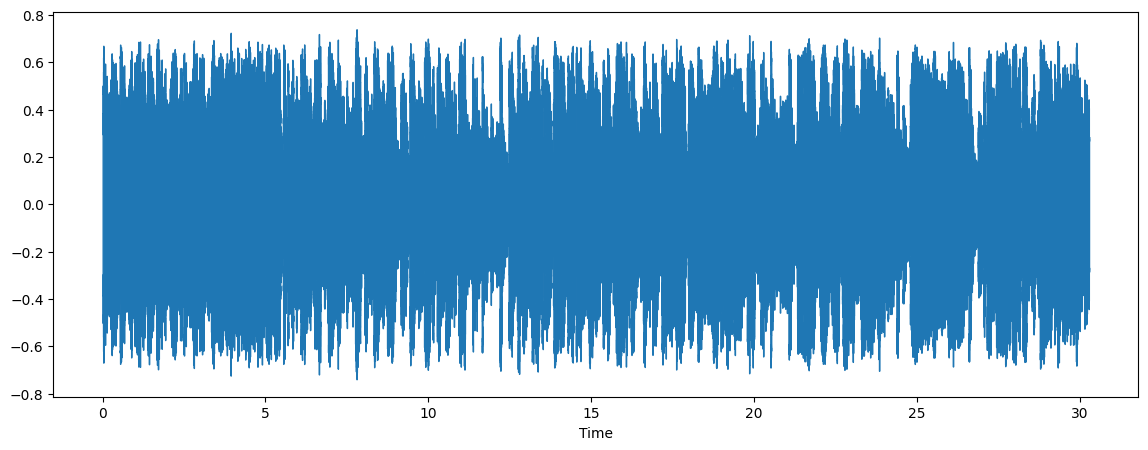

In [10]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [11]:
from IPython.display import Audio
Audio(data=x, rate=sr)

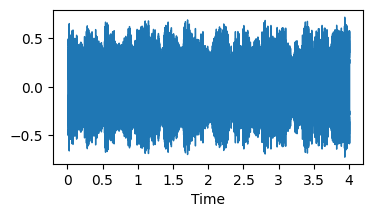

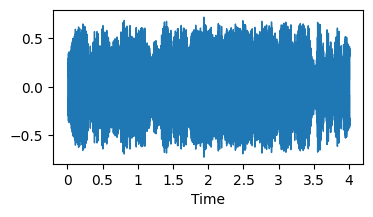

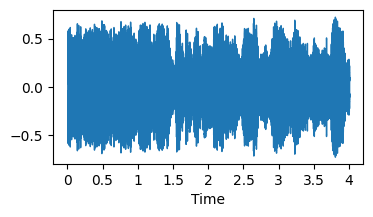

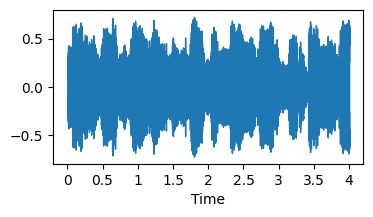

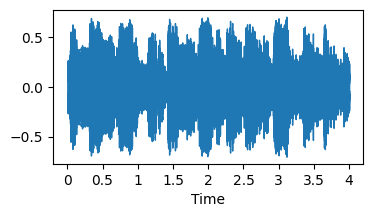

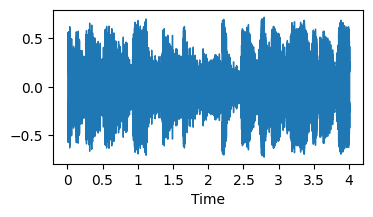

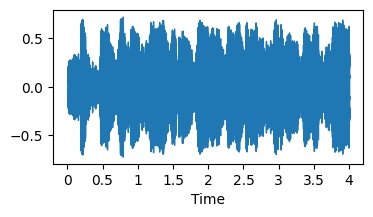

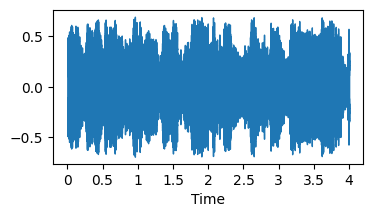

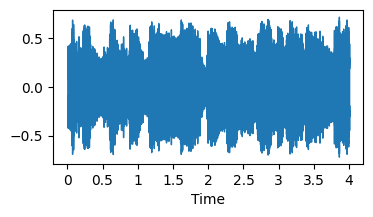

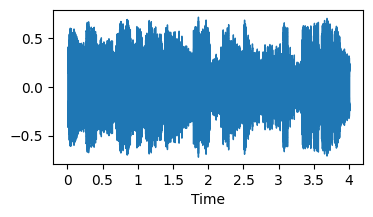

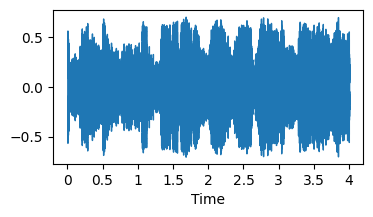

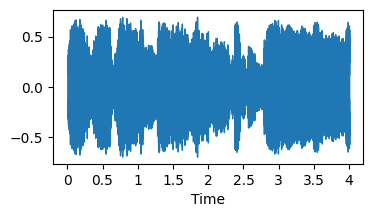

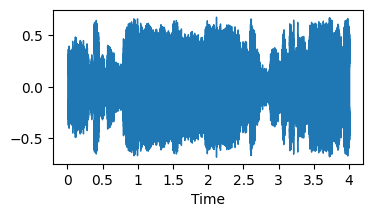

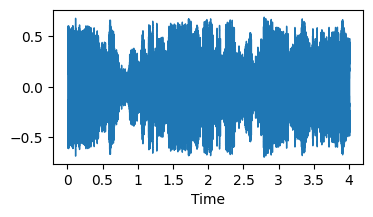

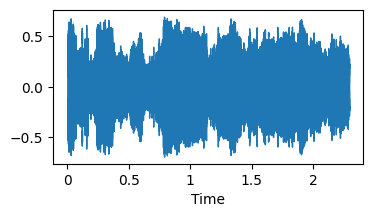

In [12]:
audio_path = "./disco.00005.wav"
x, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [13]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds
    
    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract the chunk of audio
        chunk = y[start:end]
        
        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


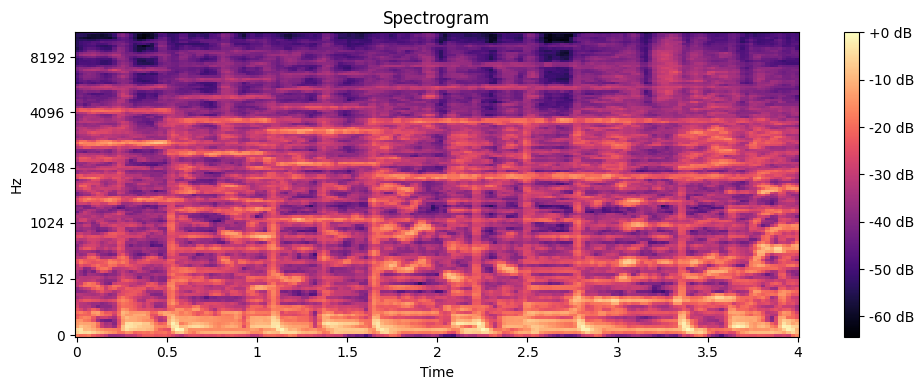

(128, 173)


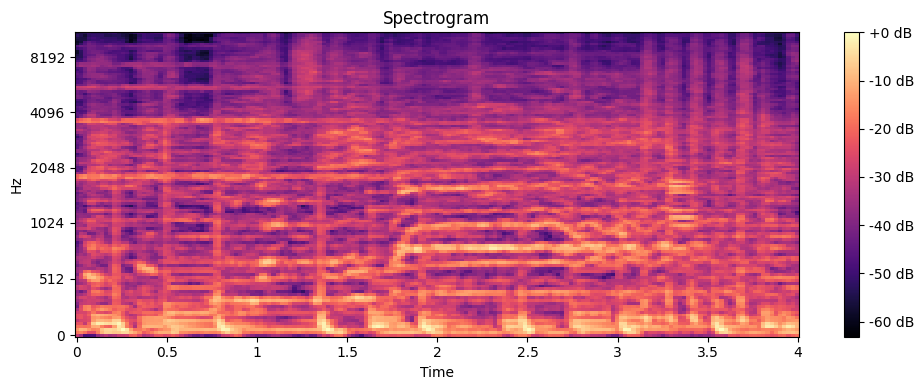

(128, 173)


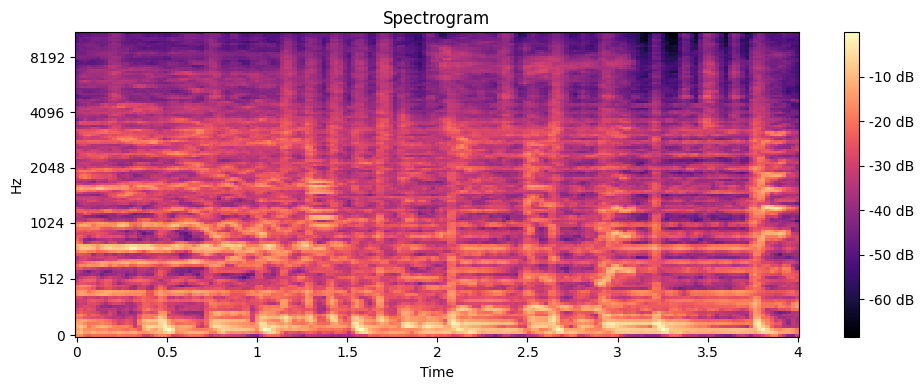

(128, 173)


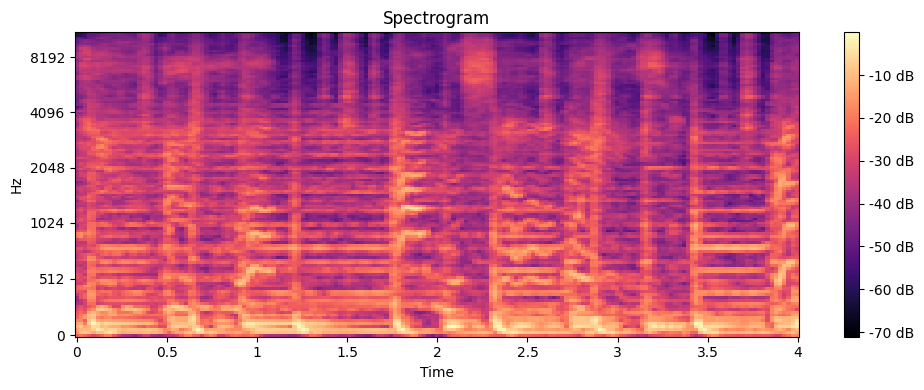

(128, 173)


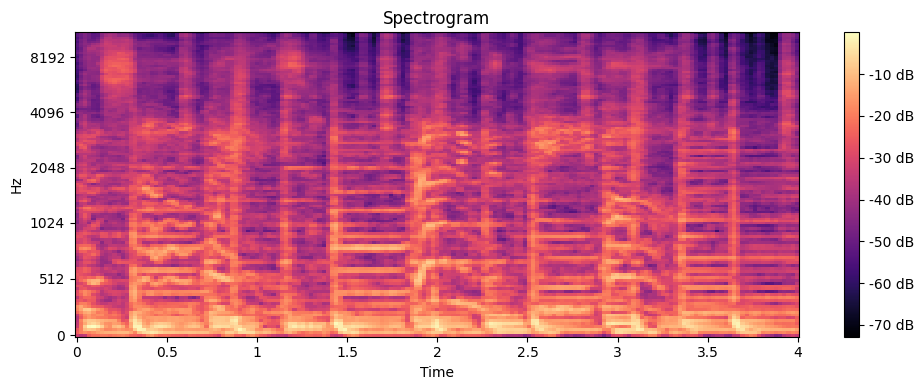

(128, 173)


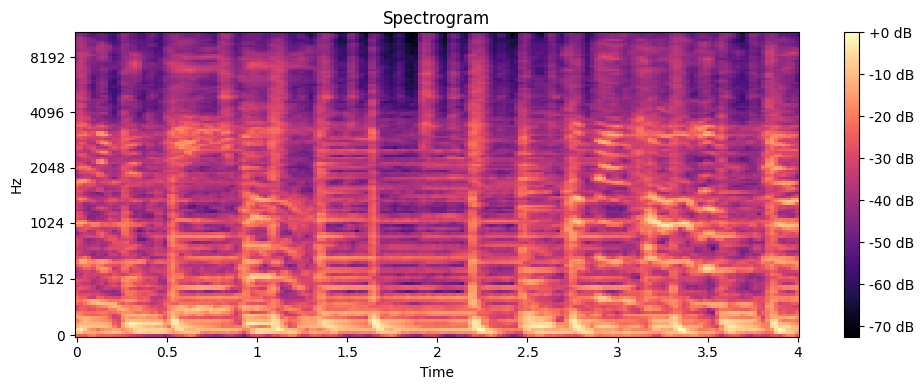

(128, 173)


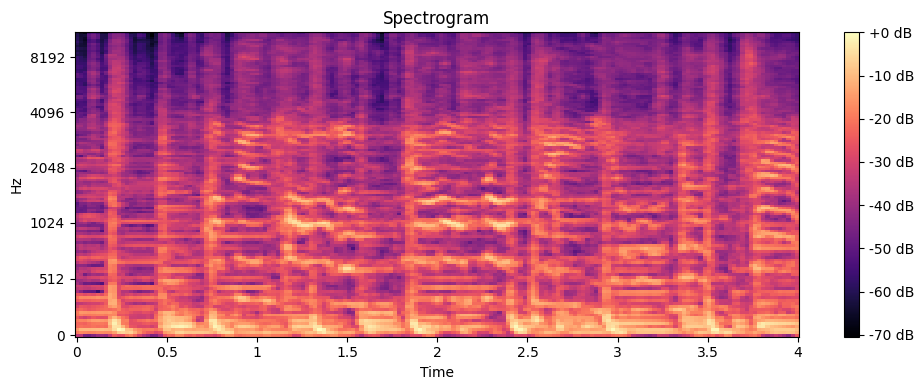

(128, 173)


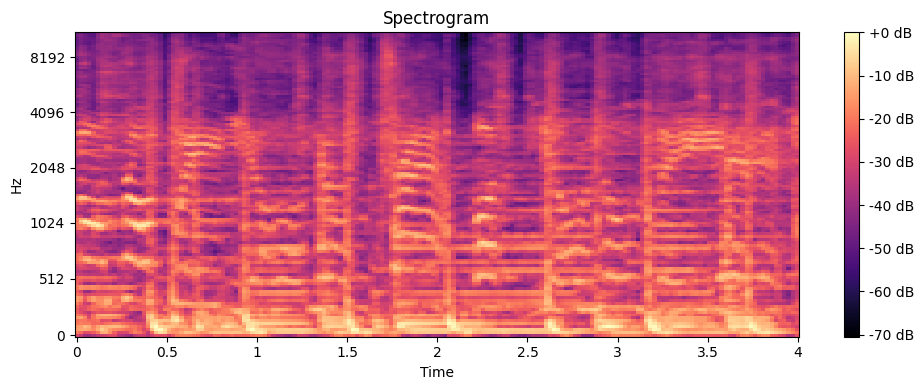

(128, 173)


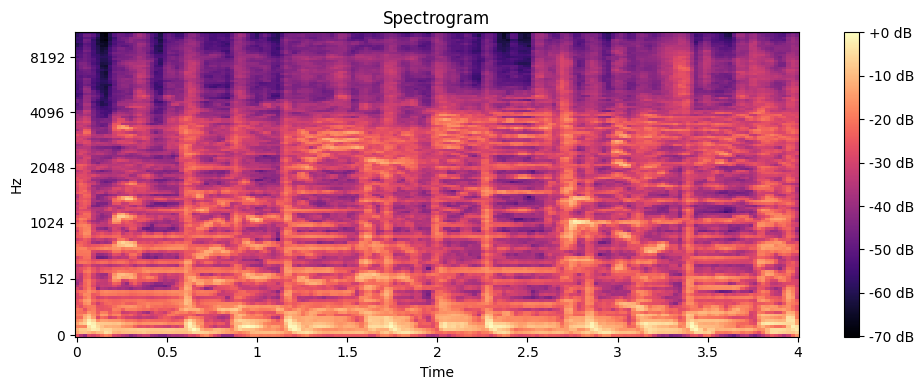

(128, 173)


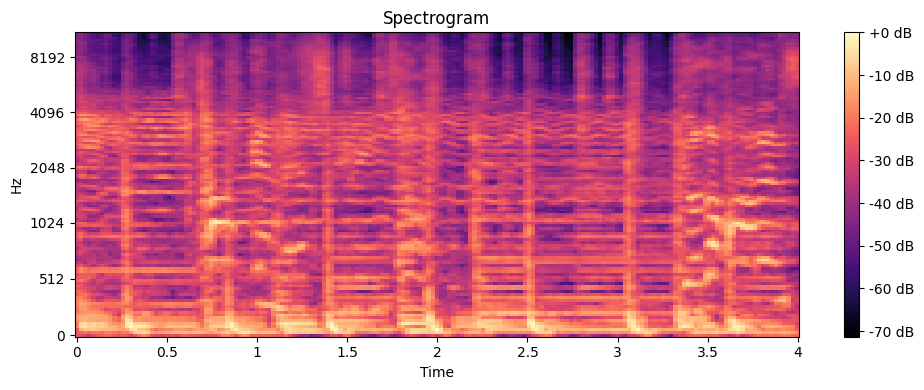

(128, 173)


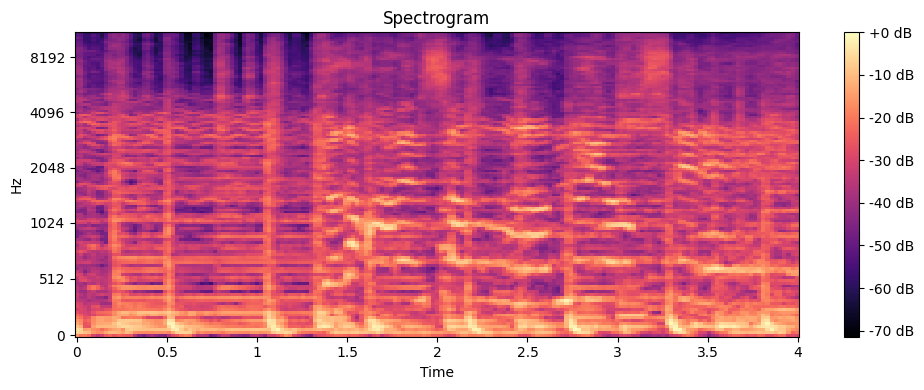

(128, 173)


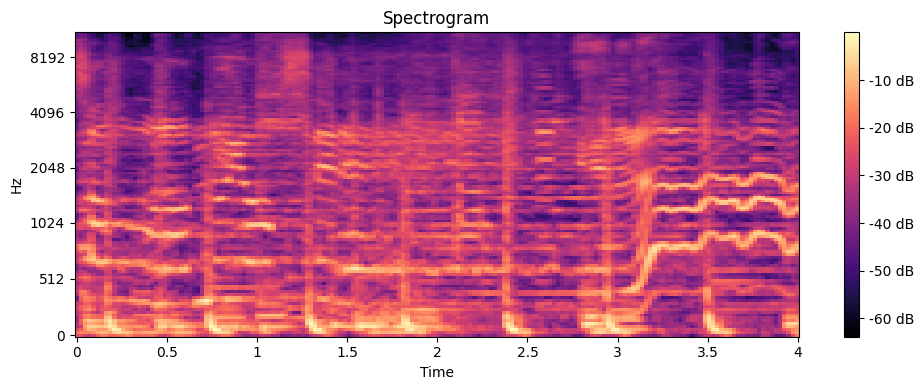

(128, 173)


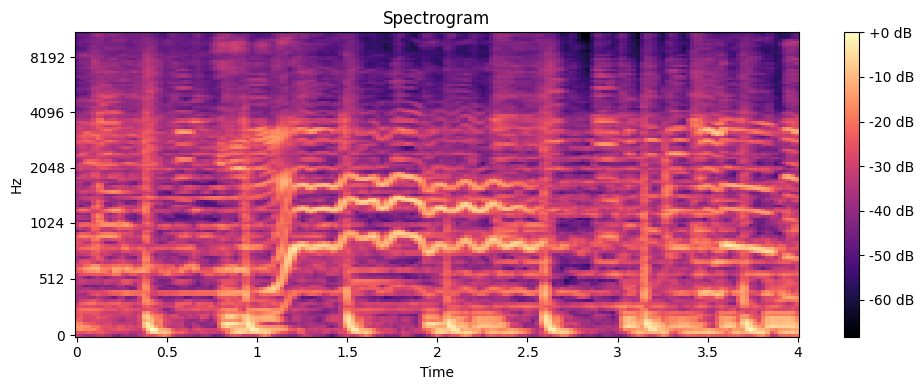

(128, 173)


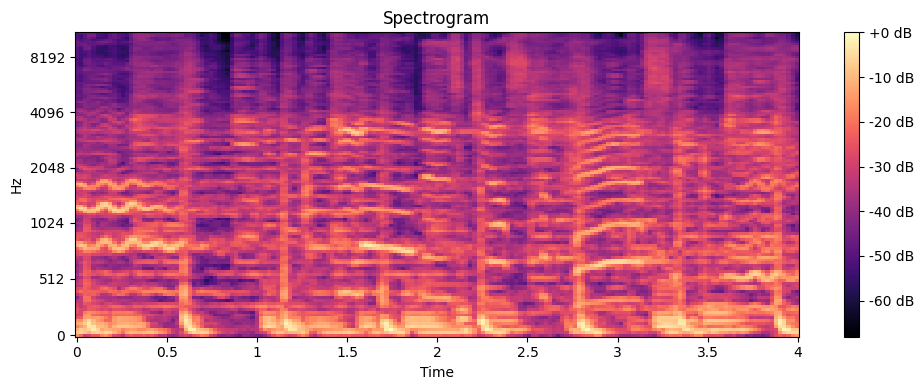

(128, 99)


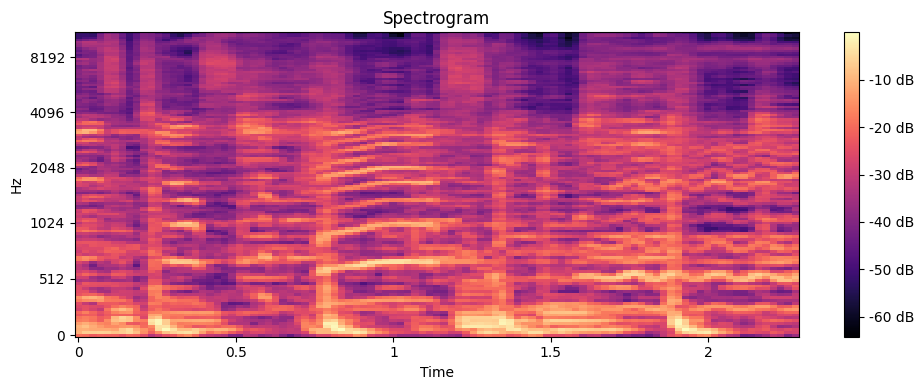

In [14]:
plot_melspectrogram_chunks(y=x,sr=sr)

In [15]:
# Define your folder structure
data_dir = './genres_original'
classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [16]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []
    
    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds
                
                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
                    
                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    
    return np.array(data), np.array(labels)

In [17]:

# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
#print("\nData:",data,"\nlabel",labels)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [18]:
data.shape



(13490, 150, 150, 1)

In [19]:
labels.shape


(13490,)

In [20]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
labels.shape


(13490, 9)

In [22]:
data.shape

(13490, 150, 150, 1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [24]:
model = tf.keras.models.Sequential()

In [25]:
X_train[0].shape


(150, 150, 1)

In [26]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(tf.keras.layers.Dropout(0.3))

In [30]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Dropout(0.3))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(units=1200,activation='relu'))

In [35]:
model.add(Dropout(0.45))

In [36]:
model.add(Dense(units=len(classes),activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
338/338 [==============================] - 505s 1s/step - loss: 1.3078 - accuracy: 0.5599 - val_loss: 0.7844 - val_accuracy: 0.7183
Epoch 2/30
338/338 [==============================] - 492s 1s/step - loss: 0.8448 - accuracy: 0.7146 - val_loss: 0.7263 - val_accuracy: 0.7583
Epoch 3/30
338/338 [==============================] - 485s 1s/step - loss: 0.6789 - accuracy: 0.7727 - val_loss: 0.7866 - val_accuracy: 0.7398
Epoch 4/30
338/338 [==============================] - 484s 1s/step - loss: 0.6071 - accuracy: 0.7947 - val_loss: 0.5732 - val_accuracy: 0.8180
Epoch 5/30
338/338 [==============================] - 485s 1s/step - loss: 0.5026 - accuracy: 0.8273 - val_loss: 0.5747 - val_accuracy: 0.8054
Epoch 6/30
338/338 [==============================] - 493s 1s/step - loss: 0.4414 - accuracy: 0.8541 - val_loss: 0.5201 - val_accuracy: 0.8195
Epoch 7/30
338/338 [==============================] - 484s 1s/step - loss: 0.4160 - accuracy: 0.8630 - val_loss: 0.5417 - val_accuracy: 0.8232

In [73]:
model.save("Trained_model.h5")

C:\Users\jayas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
training_history.history

{'loss': [1.3077741861343384,
  0.8447952270507812,
  0.6789065599441528,
  0.6071338653564453,
  0.5026029348373413,
  0.4413831830024719,
  0.41599172353744507,
  0.37879136204719543,
  0.33719539642333984,
  0.27911221981048584,
  0.2844630181789398,
  0.3023902475833893,
  0.2686355710029602,
  0.2757709324359894,
  0.20830713212490082,
  0.2164517194032669,
  0.23381637036800385,
  0.2202662229537964,
  0.1858987957239151,
  0.22530914843082428,
  0.23997007310390472,
  0.18703283369541168,
  0.16264954209327698,
  0.19497863948345184,
  0.20742842555046082,
  0.20080840587615967,
  0.16440999507904053,
  0.18473771214485168,
  0.17714400589466095,
  0.2630721926689148],
 'accuracy': [0.5598591566085815,
  0.7146034240722656,
  0.7727019786834717,
  0.7946627140045166,
  0.8272794485092163,
  0.854058563709259,
  0.8629540205001831,
  0.8768532276153564,
  0.8858413696289062,
  0.9103039503097534,
  0.9056708812713623,
  0.9020570516586304,
  0.915770947933197,
  0.911137878894805

In [75]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [76]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9594143629074097


In [77]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8813936114311218


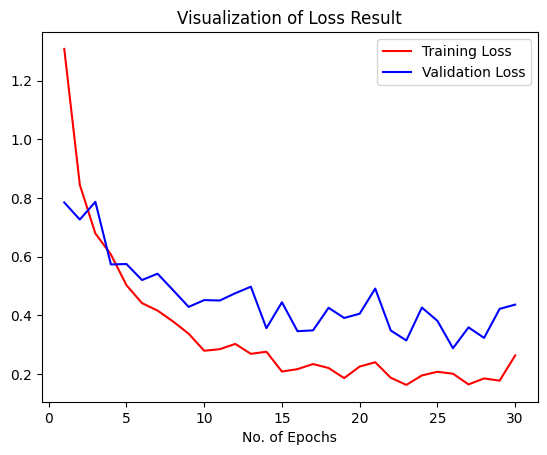

In [78]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

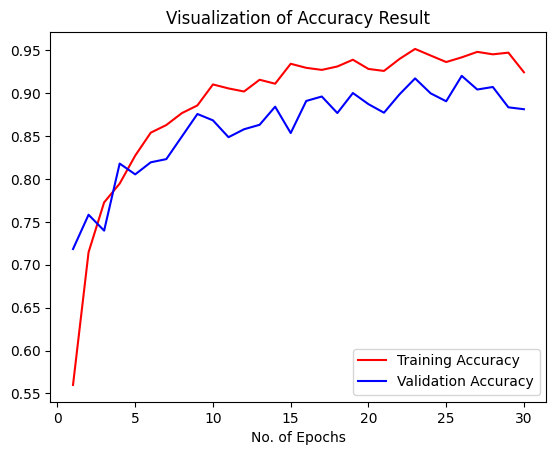

In [79]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [80]:
y_pred = model.predict(X_test)
y_pred

85/85 [==============================] - 25s 294ms/step


array([[3.40368410e-06, 2.52508926e-06, 9.72477794e-01, ...,
        1.76922171e-04, 1.59486255e-04, 2.00578291e-02],
       [3.84140849e-01, 4.47142374e-05, 6.51377067e-03, ...,
        1.76439295e-04, 4.70950380e-02, 2.14004204e-01],
       [1.43829215e-08, 2.01901061e-12, 9.99999881e-01, ...,
        8.89333659e-12, 1.39339789e-07, 4.12619450e-09],
       ...,
       [4.95910856e-32, 2.97836688e-27, 7.89567422e-22, ...,
        1.00000000e+00, 7.94554889e-17, 2.45220459e-16],
       [8.25078223e-06, 6.01959416e-09, 9.99816477e-01, ...,
        1.69591246e-07, 9.14507837e-05, 4.15109571e-05],
       [7.09700817e-03, 8.14363768e-04, 5.99825848e-03, ...,
        1.24541586e-02, 3.93658727e-02, 1.84700415e-01]], dtype=float32)

In [81]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([2, 0, 2, ..., 6, 2, 4], dtype=int64)

In [82]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([2, 0, 2, ..., 6, 2, 5], dtype=int64)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.95      0.88      0.91       316
   classical       0.98      0.93      0.95       291
     country       0.88      0.85      0.86       326
       disco       0.92      0.88      0.90       289
      hiphop       0.86      0.92      0.89       295
       metal       0.93      0.87      0.90       298
         pop       0.87      0.92      0.89       318
      reggae       0.88      0.90      0.89       273
        rock       0.71      0.78      0.75       292

    accuracy                           0.88      2698
   macro avg       0.88      0.88      0.88      2698
weighted avg       0.89      0.88      0.88      2698



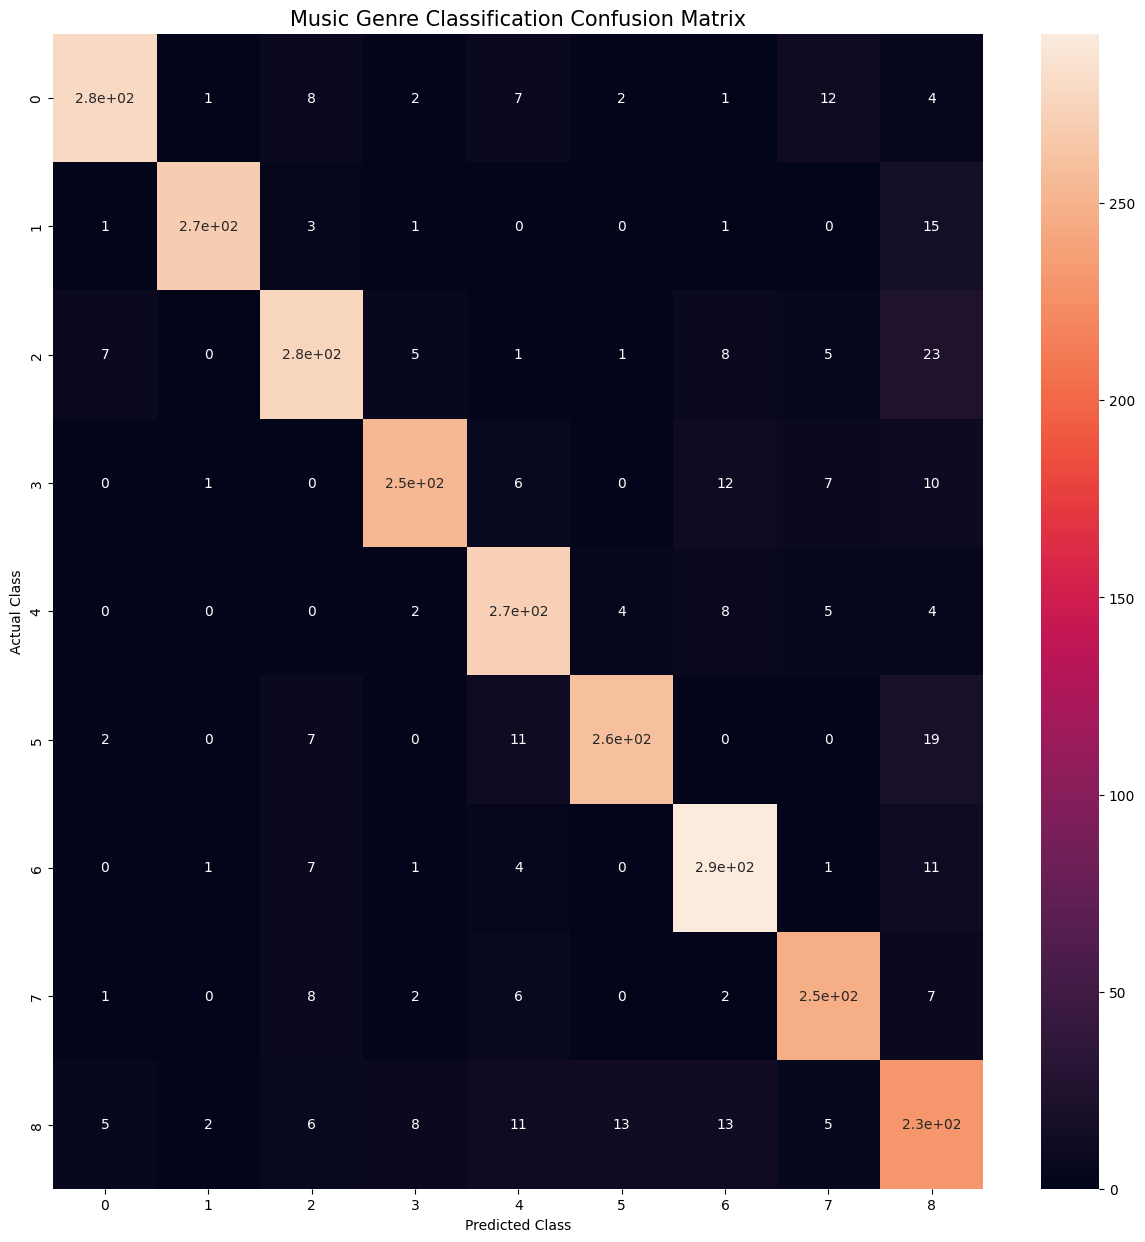

In [84]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()